### Set up

In [2]:
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pyrecorder.recorder import Recorder
from pyrecorder.writers.video import Video

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.visualization.scatter import Scatter

F = get_problem("zdt3")

algorithm = NSGA2(pop_size=100, eliminate_duplicates=True)

ret = minimize(F,
               algorithm,
               termination=('n_gen', 100),
               seed=1,
               save_history=True,
               verbose=False)

/home/dev/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### End Result

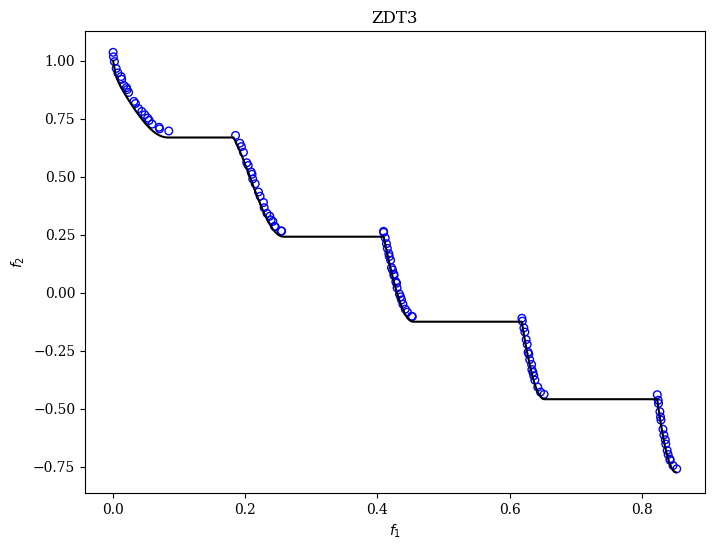

In [3]:
plot = Scatter(title="ZDT3")
plot.add(F.pareto_front(), color="black", plot_type="line")
plot.add(ret.F, s=30, facecolors='none', edgecolors='blue')
plot.show()

#### Normalization

In [4]:
fl = ret.F.min(axis=0)
fu = ret.F.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

Scale f1: [4.359934637225541e-07, 0.8529364110896426]
Scale f2: [-0.7585094984051265, 1.0368568112438195]


In [5]:
approx_ideal = ret.F.min(axis=0)
approx_nadir = ret.F.max(axis=0)

nF = (ret.F - approx_ideal) / (approx_nadir - approx_ideal)

fl = nF.min(axis=0)
fu = nF.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

Scale f1: [0.0, 1.0]
Scale f2: [0.0, 1.0]


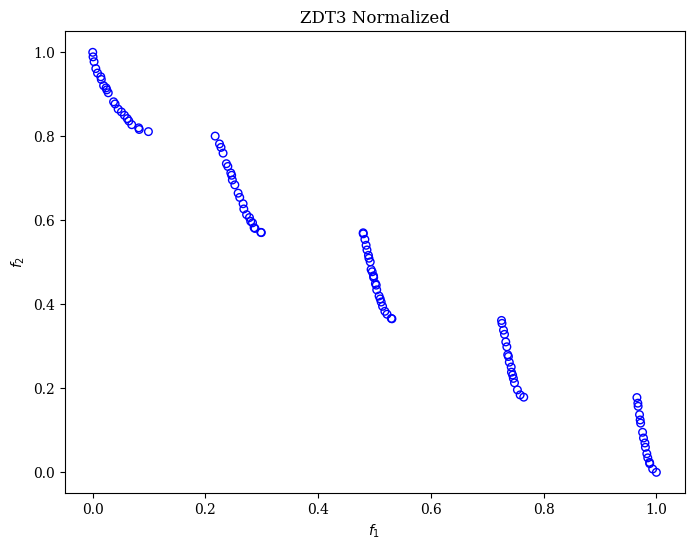

In [6]:
plot = Scatter(title="ZDT3 Normalized")
plot.add(nF, s=30, facecolors='none', edgecolors='blue')
plot.show()

#### Solution Selection

In [7]:
import numpy as np
weights = np.array([0.6, 0.4])

from pymoo.decomposition.asf import ASF

decomp = ASF()
i = decomp.do(nF, 1/weights).argmin()

print("Best regarding ASF: Point \ni = %s\nF = %s" % (i, ret.F[i]))

Best regarding ASF: Point 
i = 7
F = [0.25512583 0.26620614]


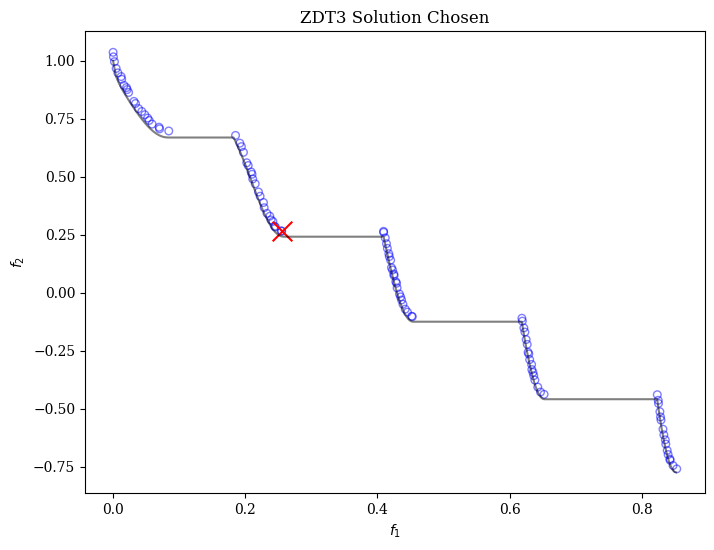

In [8]:
plot = Scatter(title="ZDT3 Solution Chosen")
plot.add(ret.F, s=30, facecolors='none', edgecolors='blue', alpha=.5)
plot.add(F.pareto_front(), color="black", plot_type="line", alpha=.5)
plot.add(ret.F[i], marker="x", color="red", s=200)
plot.show()

### Record solution to video

In [9]:
with Recorder(Video("zdt3.mp4", codec='mp4v',fps=3)) as rec:
    
    # for each algorithm object in the history
    for entry in ret.history:
        
        f = entry.pop.get("F")
        
        fl = f.min(axis=0)
        fu = f.max(axis=0)
        
        approx_ideal = f.min(axis=0)
        approx_nadir = f.max(axis=0)

        nF = (f - approx_ideal) / (approx_nadir - approx_ideal)

        fl = nF.min(axis=0)
        fu = nF.max(axis=0)
        
        weights = np.array([0.3, 0.7])

        decomp = ASF()
        i = decomp.do(nF, 1/weights).argmin()
        
        sc = Scatter(title=(f"ZDT3 - NSGA2 Gen {{}} - Solution = {{}}".format(entry.n_gen, f[i])))
        sc.add(entry.pop.get("F"), s=30, facecolors='none', edgecolors='blue', alpha=.5)
        sc.add(entry.problem.pareto_front(), color="black", plot_type="line", alpha=.5)
        sc.add(f[i], marker="x", color="red", s=200)
        sc.do()

        # finally record the current visualization to the video
        rec.record()